In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        p=os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [40]:
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [41]:
data=pd.read_csv(p,sep=',')
data.head()
Label=['Valid','Fraud']

In [42]:
data.isnull().values.any()

False

Text(0, 0.5, 'No. of Transactions')

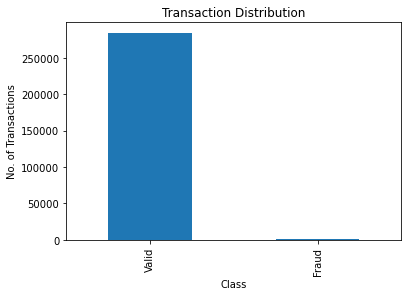

In [43]:
count_classes = pd.value_counts(data['Class'])
count_classes.plot(kind = 'bar')
plt.title("Transaction Distribution")
plt.xticks(range(2), Label)
plt.xlabel("Class")
plt.ylabel("No. of Transactions")

In [44]:
fraud=data[data['Class']==1]
valid=data[data['Class']==0]
print(fraud.shape,valid.shape)

(492, 31) (284315, 31)


So we can see there are very few **Fraud** transactions as compared to **Valid** transcations.
*Ratio: 492 / 284315 * 100 = 0.17304* 

In [45]:
sample_data= data.sample(frac = 0.1,random_state=1)
sample_data.shape

(28481, 31)

In [46]:
Fraud = sample_data[sample_data['Class']==1]

Valid = sample_data[sample_data['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [54]:
columns = sample_data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = sample_data[columns]
Y = sample_data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


# Isolation Forest Algorithm:
Isolation forest is highly used in case of unbalanced dataset. As it isolate observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

In [90]:
clf_name="Isolation Forest"
clf=IsolationForest(n_estimators=100, max_samples=len(X),contamination=outlier_fraction,random_state=state, verbose=0)
clf.fit(X)
scores_prediction = clf.decision_function(X)
y_pred = clf.predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
print("{} Errors : {}".format(clf_name,n_errors))
print("Accuracy Score : ",accuracy_score(Y,y_pred)*100)

Isolation Forest Errors : 75
Accuracy Score :  99.73666654962958


# Support Vectorm Machine Algorithm:
Using an algorithm which cannot handle unbalanced dataset that well to show error difference between these two algorithms.

In [94]:
clf=OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05,max_iter=-1)
clf_name="Support Vector Machine"
clf.fit(X)
y_pred = clf.predict(X)
y_pred = clf.predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
print("{} Errors : {}".format(clf_name,n_errors))
print("Accuracy Score : ",accuracy_score(Y,y_pred)*100)

Support Vector Machine Errors : 8516
Accuracy Score :  70.09936448860644


## Observation
As we can see the Error difference between these two algorithms we can conclude that Isolation Forest holds best for the unbalanced dataset.